In [47]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [49]:
item_spend = pd.read_csv("data/item_spend.csv")
player_activity = pd.read_csv("data/player_activity.csv")
player_stats = pd.read_csv("data/player_statistics.csv")

In [50]:
merge1 = pd.merge(player_stats, player_activity, on=['account_id', 'platform_id', 'occur_date'])
merged = pd.merge(item_spend, merge1, on=['account_id', 'platform_id', 'occur_date'])
merged['occur_date'] = pd.to_datetime(merged['occur_date'])
merged['first_day_played'] = pd.to_datetime(merged['occur_date'])
merged.sort_values('occur_date')

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent,ltd_days_played,first_day_played,evc_balance,...,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success,money_vs_time_spent,rp_vs_time_spent
715952,5053,PS4,2020-09-01,Sticky Bomb,WEAPON,PROJECTILES,232.184407,51,2020-09-01,4533.721546,...,Heist,0.884232,0,0,0,270.232602,133.859037,0,306.743644,152.515413
556844,2783,XBOX,2020-09-01,Pegassi Toros,CAR,SUV,198673.255600,184,2020-09-01,71417.058060,...,Heist,3.799831,29,0,0,3949.553420,932.705916,1,1039.665458,245.722988
556845,2783,XBOX,2020-09-01,Pegassi Toros,CAR,SUV,198673.255600,184,2020-09-01,71417.058060,...,Heist,3.764326,3,0,0,0.000000,371.425695,0,0.265652,98.935561
556846,2783,XBOX,2020-09-01,Pegassi Toros,CAR,SUV,198673.255600,184,2020-09-01,71417.058060,...,Heist,1.194221,0,0,0,0.000000,0.000000,0,0.837366,0.837366
556847,2783,XBOX,2020-09-01,Pegassi Vacca,CAR,SUPER,95746.147300,184,2020-09-01,71417.058060,...,Executive,0.167530,0,0,0,0.000000,0.000000,0,5.969093,5.969093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446452,9447,PC,2020-11-30,Albany Washington,CAR,SEDAN,0.000000,36,2020-11-30,151091.546600,...,Biker,4.377387,0,3,0,0.000000,331.334251,0,0.228447,75.920691
446453,9447,PC,2020-11-30,Albany Washington,CAR,SEDAN,0.000000,36,2020-11-30,151091.546600,...,Gunrunner,4.415216,0,0,0,0.000000,497.001376,0,0.226489,112.792067
446454,9447,PC,2020-11-30,Albany Washington,CAR,SEDAN,0.000000,36,2020-11-30,151091.546600,...,Gunrunner,4.528704,0,0,0,0.000000,497.001376,0,0.220814,109.965536
446442,9447,PC,2020-11-30,Chumash,PROPERTY,GUNRUNNING BUNKER,658254.762700,36,2020-11-30,151091.546600,...,Gunrunner,4.112582,0,0,0,0.000000,0.000000,0,0.243156,0.243156


In [51]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932107 entries, 0 to 932106
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   account_id           932107 non-null  int64         
 1   platform_id          932107 non-null  object        
 2   occur_date           932107 non-null  datetime64[ns]
 3   item                 914845 non-null  object        
 4   item_type            929752 non-null  object        
 5   item_sub_type        928866 non-null  object        
 6   money_spent          932107 non-null  float64       
 7   ltd_days_played      932107 non-null  int64         
 8   first_day_played     932107 non-null  datetime64[ns]
 9   evc_balance          932107 non-null  float64       
 10  pvc_balance          932107 non-null  float64       
 11  char_rank            932107 non-null  int64         
 12  daily_playtime       932107 non-null  float64       
 13  days_since_fir

In [52]:
ordered = (merged
     .sort_values(by=['account_id', 'platform_id', 'occur_date'], ascending=[True, False, True]))

In [53]:
# get individual consoles
ps4 = merged[merged['platform_id'] == 'PS4']
xbox = merged[merged['platform_id'] == 'XBOX']
pc = merged[merged['platform_id'] == 'PC']

In [54]:
# total unique players per console
totalPs = len(ps4['account_id'].unique())
totalX = len(xbox['account_id'].unique())
totalPc = len(pc['account_id'].unique())

meanTotalPs = ps4['char_rank'].mean()
meanTotalX = xbox['char_rank'].mean()
meanTotalPc = pc['char_rank'].mean()

medTotalPs = ps4['char_rank'].median()
medTotalX = xbox['char_rank'].median()
medTotalPc = pc['char_rank'].median()

print(f"Total Players PS4: {totalPs}")
print(f"Total Players Xbox: {totalX}")
print(f"Total Players PC: {totalPc}")
print()
print(f"Mean Rank Total PS4: {meanTotalPs}")
print(f"Mean Rank Total Xbox: {meanTotalX}")
print(f"Mean Rank Total PC: {meanTotalPc}")
print()
print(f"Median Rank Total PS4: {medTotalPs}")
print(f"Median Rank Total Xbox: {medTotalX}")
print(f"Median Rank Total PC: {medTotalPc}")

Total Players PS4: 2039
Total Players Xbox: 4451
Total Players PC: 1445

Mean Rank Total PS4: 53.862611579800365
Mean Rank Total Xbox: 51.482803613007405
Mean Rank Total PC: 70.29364013757417

Median Rank Total PS4: 40.0
Median Rank Total Xbox: 38.0
Median Rank Total PC: 52.0


In [55]:
# order by most recent transaction
recentPs4 = (ps4.sort_values(by=['account_id', 'occur_date'], ascending=[True, False])
            .drop_duplicates(subset=['account_id']))
recentXbox = (xbox.sort_values(by=['account_id', 'occur_date'], ascending=[True, False])
            .drop_duplicates(subset=['account_id']))
recentPc = (pc.sort_values(by=['account_id', 'occur_date'], ascending=[True, False])
            .drop_duplicates(subset=['account_id']))

recentPc

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent,ltd_days_played,first_day_played,evc_balance,...,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success,money_vs_time_spent,rp_vs_time_spent
288243,6,PC,2020-11-30,Maibatsu Sanchez 2,BIKE,MOTORCYCLE,0.000000e+00,52,2020-11-30,1.831404e+05,...,Heist,0.496190,0,0,0,0.000000,66.266850,1,2.015356,135.566628
678350,10,PC,2020-09-27,HVY APC,CAR,MILITARY,1.233629e+06,706,2020-09-27,5.931171e+04,...,Gunrunner,1.075432,0,0,0,154531.474300,994.002753,0,143693.376900,925.212039
857458,14,PC,2020-11-24,Bullpup Rifle,WEAPON,ASSAULT RIFLES,5.784663e+03,12,2020-11-24,1.052910e+04,...,Freeroam - Business Battles,5.490648,0,0,0,649.597602,165.667125,0,118.491943,30.354725
883771,36,PC,2020-11-29,RC Bandito,OTHER,NaN,6.343182e+05,138,2020-11-29,9.382408e+03,...,Executive,0.718756,0,0,0,25500.603460,662.668502,1,35480.188350,923.356976
315821,39,PC,2020-09-06,Obey Omnis,CAR,SPORT,0.000000e+00,72,2020-09-06,8.618733e+04,...,Heist,4.572651,41,0,0,935.420547,470.825971,0,204.787236,103.184340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900004,9510,PC,2020-11-30,Sweeper Shotgun,WEAPON,SHOTGUNS,5.944240e+03,15,2020-11-30,1.893849e+05,...,Heist,2.971446,3,0,0,0.000000,1049.335573,1,0.336536,353.476245
829860,9512,PC,2020-11-15,Karin Kuruma (Armored),CAR,SPORT,2.785614e+05,15,2020-11-15,8.165610e+04,...,Heist,0.142011,0,0,0,0.000000,0.000000,0,7.041704,7.041704
504241,9518,PC,2020-09-08,Buzzard Attack Chopper,HELICOPTER,HELICOPTER,0.000000e+00,264,2020-09-08,2.295541e+06,...,Heist,2.053589,0,0,0,0.000000,497.001376,0,0.486952,242.502944
374987,9521,PC,2020-11-29,Willard Faction,CAR,MUSCLE,1.436192e+04,46,2020-11-29,8.256141e+06,...,Casino,0.342987,0,1,0,54.566199,57.983494,0,162.006629,171.969961


In [56]:
# checks for active players with at least some stat under kills/deaths/suicides
recentPs4 = recentPs4[
    (recentPs4['kills'] != 0) | 
    (recentPs4['deaths'] != 0) |
    (recentPs4['suicides'] != 0)
]

recentXbox = recentXbox[
    (recentXbox['kills'] != 0) | 
    (recentXbox['deaths'] != 0) |
    (recentXbox['suicides'] != 0)
]

recentPc = recentPc[
    (recentPc['kills'] != 0) | 
    (recentPc['deaths'] != 0) |
    (recentPc['suicides'] != 0)
]

In [57]:
activePs = len(recentPs4['account_id'])
activeX = len(recentXbox['account_id'])
activePc = len(recentPc['account_id'])

meanActivePs = recentPs4['char_rank'].mean()
meanActiveX = recentXbox['char_rank'].mean()
meanActivePc = recentPc['char_rank'].mean()

medActivePs = recentPs4['char_rank'].median()
medActiveX = recentXbox['char_rank'].median()
medActivePc = recentPc['char_rank'].median()

print(f"Active PS: {activePs}")
print(f"Active Xbox: {activeX}")
print(f"Active PC: {activePc}")
print()
print(f"Mean Rank Active PS: {meanActivePs}")
print(f"Mean Rank Active Xbox: {meanActiveX}")
print(f"Mean Rank Active PC: {meanActivePc}")
print()
print(f"Median Rank Active PS: {medActivePs}")
print(f"Median Rank Active Xbox: {medActiveX}")
print(f"Median Rank Active PC: {medActivePc}")

Active PS: 526
Active Xbox: 1190
Active PC: 354

Mean Rank Active PS: 51.00570342205323
Mean Rank Active Xbox: 56.15042016806723
Mean Rank Active PC: 67.4322033898305

Median Rank Active PS: 38.0
Median Rank Active Xbox: 40.0
Median Rank Active PC: 49.5


In [58]:
ratioPs = (activePs / totalPs)
ratioX = (activeX / totalX)
ratioPc = (activePc / totalPc)

print(f"Active PS: {ratioPs}")
print(f"Active Xbox: {ratioX}")
print(f"Active PC: {ratioPc}")

Active PS: 0.25796959293771454
Active Xbox: 0.2673556504156369
Active PC: 0.24498269896193772


In [59]:
# creating 3 clusters 
scalerPs4 = StandardScaler()
scalerXbox = StandardScaler()
scalerPc = StandardScaler()

scaledDataPs4 = scalerPs4.fit_transform(recentPs4[['char_rank']])
scaledDataXbox = scalerXbox.fit_transform(recentXbox[['char_rank']])
scaledDataPc = scalerPc.fit_transform(recentPc[['char_rank']])

kmeansPs4 = KMeans(n_clusters=3)
kmeansPs4.fit(scaledDataPs4)
recentPs4['cluster'] = kmeansPs4.labels_

kmeansXbox = KMeans(n_clusters=3)
kmeansXbox.fit(scaledDataXbox)
recentXbox['cluster'] = kmeansXbox.labels_

kmeansPc = KMeans(n_clusters=3)
kmeansPc.fit(scaledDataPc)
recentPc['cluster'] = kmeansPc.labels_

recentPs4 = recentPs4.sort_values(by='char_rank', ascending=True)
recentXbox = recentXbox.sort_values(by='char_rank', ascending=True)
recentPc = recentPc.sort_values(by='char_rank', ascending=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/sz/xbbbpphs0fq__8grz7kwv9lw0000gn/T/ipykernel_55992/33629

In [60]:
# gets order unique clusters based on rank
uniquePs4 = recentPs4['cluster'].unique()
uniqueXbx = recentXbox['cluster'].unique()
uniquePc = recentPc['cluster'].unique()

In [61]:
# sets order of displaying character rank (ps4)
c0Ps = recentPs4[recentPs4['cluster'] == uniquePs4[0]][['char_rank', 'cluster']]
psLowMin = min(c0Ps['char_rank'])
psLowMax = max(c0Ps['char_rank'])
c0RankPs = "{} - {}".format(psLowMin, psLowMax)
c1Ps = recentPs4[recentPs4['cluster'] == uniquePs4[1]][['char_rank', 'cluster']]
psMidMin = min(c1Ps['char_rank'])
psMidMax = max(c1Ps['char_rank'])
c1RankPs = "{} - {}".format(psMidMin, psMidMax)
c2Ps = recentPs4[recentPs4['cluster'] == uniquePs4[2]][['char_rank', 'cluster']]
psHighMin = min(c2Ps['char_rank'])
psHighMax = max(c2Ps['char_rank'])
c2RankPs = "{} - {}".format(psHighMin, psHighMax)

In [62]:
# sets order of displaying character rank (xbox)
c0X = recentXbox[recentXbox['cluster'] == uniqueXbx[0]][['char_rank', 'cluster']]
xLowMin = min(c0Ps['char_rank'])
xLowMax = max(c0Ps['char_rank'])
c0RankX = "{} - {}".format(xLowMin, xLowMax)
c1X = recentXbox[recentXbox['cluster'] == uniqueXbx[1]][['char_rank', 'cluster']]
xMidMin = min(c1Ps['char_rank'])
xMidMax = max(c1Ps['char_rank'])
c1RankX = "{} - {}".format(xMidMin, xMidMax)
c2X = recentXbox[recentXbox['cluster'] == uniqueXbx[2]][['char_rank', 'cluster']]
xHighMin = min(c2Ps['char_rank'])
xHighMax = max(c2Ps['char_rank'])
c2RankX = "{} - {}".format(xHighMin, xHighMax)

In [63]:
# sets order of displaying character rank (pc)
c0P = recentPc[recentPc['cluster'] == uniquePc[0]][['char_rank', 'cluster']]
pcLowMin = min(c0Ps['char_rank'])
pcLowMax = max(c0Ps['char_rank'])
c0RankP = "{} - {}".format(pcLowMin, pcLowMax)
c1P = recentPc[recentPc['cluster'] == uniquePc[1]][['char_rank', 'cluster']]
pcMidMin = min(c1Ps['char_rank'])
pcMidMax = max(c1Ps['char_rank'])
c1RankP = "{} - {}".format(pcMidMin, pcMidMax)
c2P = recentPc[recentPc['cluster'] == uniquePc[2]][['char_rank', 'cluster']]
pcHighMin = min(c2Ps['char_rank'])
pcHighMax = max(c2Ps['char_rank'])
c2RankP = "{} - {}".format(pcHighMin, pcHighMax)

Text(0, 0.5, '# of Characters in Each Cluster')

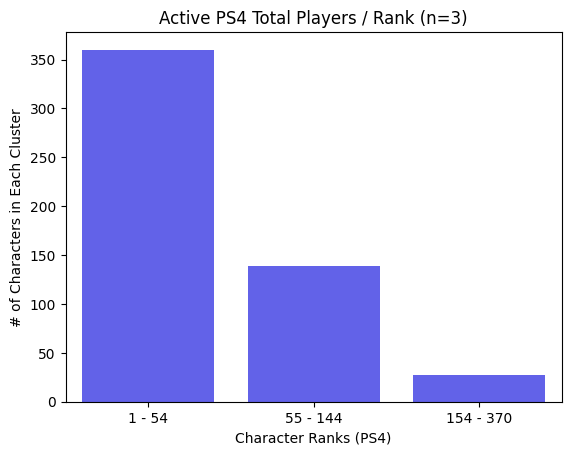

In [64]:
#ps4 chart
new_label_ps4 = [c0RankPs, c1RankPs, c2RankPs]

# set the new labels
ps4Rank = sns.countplot(data=recentPs4, x='cluster', color='blue', alpha=0.7, order=uniquePs4)
ps4Rank.set_xticks(range(len(new_label_ps4)))
ps4Rank.set_xticklabels(new_label_ps4)
ps4Rank.set_title('Active PS4 Total Players / Rank (n=3)')
ps4Rank.set_xlabel('Character Ranks (PS4)')
ps4Rank.set_ylabel('# of Characters in Each Cluster')

Text(0, 0.5, '# of Characters in Each Cluster')

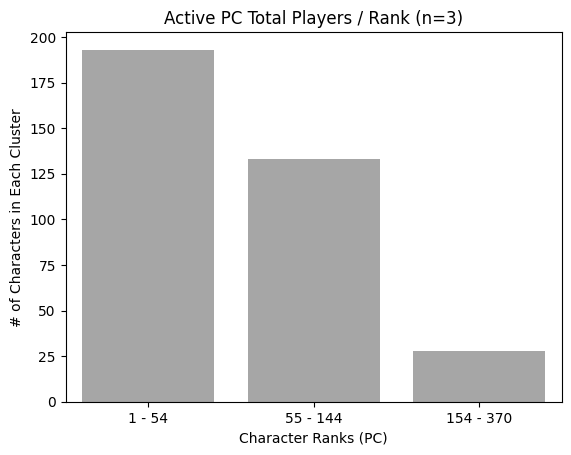

In [65]:
# pc chart
new_label_pc = [c0RankP, c1RankP, c2RankP]

pcRank = sns.countplot(data=recentPc, x='cluster', color='grey', alpha=0.7, order=uniquePc)
pcRank.set_xticks(range(len(new_label_pc)))
pcRank.set_xticklabels(new_label_pc)
pcRank.set_title('Active PC Total Players / Rank (n=3)')
pcRank.set_xlabel('Character Ranks (PC)')
pcRank.set_ylabel('# of Characters in Each Cluster')

Text(0, 0.5, '# of Characters in Each Cluster')

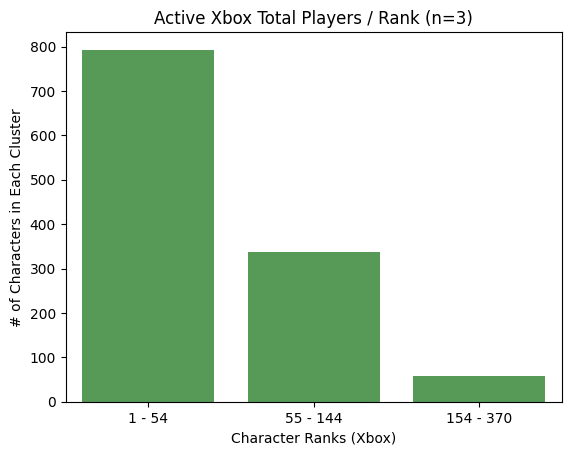

In [66]:
# xbox chart
new_label_xbx = [c0RankX, c1RankX, c2RankX]

xbxRank = sns.countplot(data=recentXbox, x='cluster', color='green', alpha=0.7, order=uniqueXbx)
xbxRank.set_xticks(range(len(new_label_xbx)))
xbxRank.set_xticklabels(new_label_xbx)
xbxRank.set_title('Active Xbox Total Players / Rank (n=3)')
xbxRank.set_xlabel('Character Ranks (Xbox)')
xbxRank.set_ylabel('# of Characters in Each Cluster')

Median low: 212154.9641
Mean low: 13758002.511399547
Median mid: 4276824.775
Mean mid: 55686620.47942304
Median high: 15238968.79
Mean high: 79481553.36194722


/var/folders/sz/xbbbpphs0fq__8grz7kwv9lw0000gn/T/ipykernel_55992/1532393317.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violinPc = sns.violinplot(data=filteredMoneyPc, x='cluster', y='evc_balance', alpha=0.6, scale='width', color='grey', order=uniquePc)


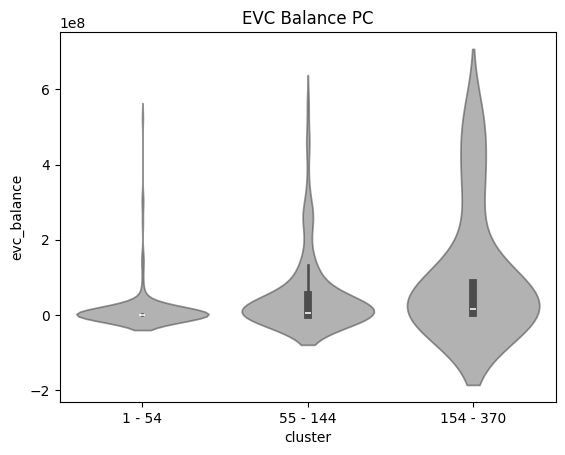

In [77]:
#### filtering evc_balance to show for quanitile between 10th and 90th
# this is to void the extremes of players that have an absurd amount of money
pc10th = recentPc['evc_balance'].quantile(0.05)
pc90th = recentPc['evc_balance'].quantile(0.95)

filteredMoneyPc = recentPc[(recentPc['evc_balance'] >= pc10th) & (recentPc['evc_balance'] <= pc90th)]
violinPc = sns.violinplot(data=filteredMoneyPc, x='cluster', y='evc_balance', alpha=0.6, scale='width', color='grey', order=uniquePc)
violinPc.set_xticks(range(len(new_label_pc)))
violinPc.set_xticklabels(new_label_pc)
# sns.histplot(filteredMoneyPc['cluster'], color='grey')
plt.title('EVC Balance PC')

pcMedLow = filteredMoneyPc[(filteredMoneyPc['char_rank'] >= pcLowMin) & (filteredMoneyPc['char_rank'] <= pcLowMax)]['evc_balance'].median()
pcMeanLow = filteredMoneyPc[(filteredMoneyPc['char_rank'] >= pcLowMin) & (filteredMoneyPc['char_rank'] <= pcLowMax)]['evc_balance'].mean()
pcMedMid = filteredMoneyPc[(filteredMoneyPc['char_rank'] >= pcMidMin) & (filteredMoneyPc['char_rank'] <= pcMidMax)]['evc_balance'].median()
pcMeanMid = filteredMoneyPc[(filteredMoneyPc['char_rank'] >= pcMidMin) & (filteredMoneyPc['char_rank'] <= pcMidMax)]['evc_balance'].mean()
pcMedHigh = filteredMoneyPc[(filteredMoneyPc['char_rank'] >= pcHighMin) & (filteredMoneyPc['char_rank'] <= pcHighMax)]['evc_balance'].median()
pcMeanHigh = filteredMoneyPc[(filteredMoneyPc['char_rank'] >= pcHighMin) & (filteredMoneyPc['char_rank'] <= pcHighMax)]['evc_balance'].mean()

print(f"Median low: {pcMedLow}")
print(f"Mean low: {pcMeanLow}")
print(f"Median mid: {pcMedMid}")
print(f"Mean mid: {pcMeanMid}")
print(f"Median high: {pcMedHigh}")
print(f"Mean high: {pcMeanHigh}")

In [69]:
# sns.scatterplot(data=filteredMoneyPc, x='cluster', y='evc_balance', alpha=0.6, color='grey')

Median low: 55839.797275000004
Mean low: 152262.70438008456
Median mid: 117766.0775
Mean mid: 335467.6151306379
Median high: 102754.8646
Mean high: 349928.3286115333


/var/folders/sz/xbbbpphs0fq__8grz7kwv9lw0000gn/T/ipykernel_55992/2878213940.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violinPs = sns.violinplot(data=filteredMoneyPs, x='cluster', y='evc_balance', alpha=0.6, scale='width', color='blue', order=uniquePs4)


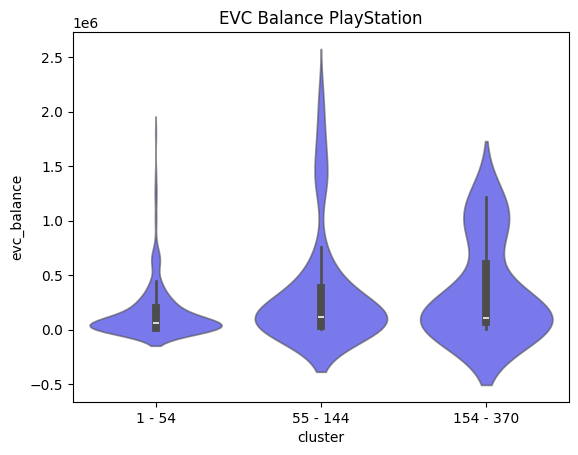

In [76]:
ps10th = recentPs4['evc_balance'].quantile(0.05)
ps90th = recentPs4['evc_balance'].quantile(0.95)

filteredMoneyPs = recentPs4[(recentPs4['evc_balance'] >= ps10th) & (recentPs4['evc_balance'] <= ps90th)]
violinPs = sns.violinplot(data=filteredMoneyPs, x='cluster', y='evc_balance', alpha=0.6, scale='width', color='blue', order=uniquePs4)
violinPs.set_xticks(range(len(new_label_ps4)))
violinPs.set_xticklabels(new_label_ps4)
# sns.histplot(filteredMoneyPs['evc_balance'], bins=10, color='blue')
plt.title('EVC Balance PlayStation')

psMedLow = filteredMoneyPs[(filteredMoneyPs['char_rank'] >= psLowMin) & (filteredMoneyPs['char_rank'] <= psLowMax)]['evc_balance'].median()
psMeanLow = filteredMoneyPs[(filteredMoneyPs['char_rank'] >= psLowMin) & (filteredMoneyPs['char_rank'] <= psLowMax)]['evc_balance'].mean()
psMedMid = filteredMoneyPs[(filteredMoneyPs['char_rank'] >= psMidMin) & (filteredMoneyPs['char_rank'] <= psMidMax)]['evc_balance'].median()
psMeanMid = filteredMoneyPs[(filteredMoneyPs['char_rank'] >= psMidMin) & (filteredMoneyPs['char_rank'] <= psMidMax)]['evc_balance'].mean()
psMedHigh = filteredMoneyPs[(filteredMoneyPs['char_rank'] >= psHighMin) & (filteredMoneyPs['char_rank'] <= psHighMax)]['evc_balance'].median()
psMeamHigh = filteredMoneyPs[(filteredMoneyPs['char_rank'] >= psHighMin) & (filteredMoneyPs['char_rank'] <= psHighMax)]['evc_balance'].mean()

print(f"Median low: {psMedLow}")
print(f"Mean low: {psMeanLow}")
print(f"Median mid: {psMedMid}")
print(f"Mean mid: {psMeanMid}")
print(f"Median high: {psMedHigh}")
print(f"Mean high: {psMeamHigh}")

In [412]:
# sns.scatterplot(data=filteredMoneyPs, x='cluster', y='evc_balance', alpha=0.6)

Median low: 108349.1474
Mean low: 271052.60928185895
Median mid: 286799.26035
Mean mid: 670351.4106579804
Median high: 628340.5659
Mean high: 1040882.2071587599


/var/folders/sz/xbbbpphs0fq__8grz7kwv9lw0000gn/T/ipykernel_55992/4270832499.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violinXbx = sns.violinplot(data=filteredMoneyX, x='cluster', y='evc_balance', alpha=0.6, scale='width', color='green', order=uniqueXbx)


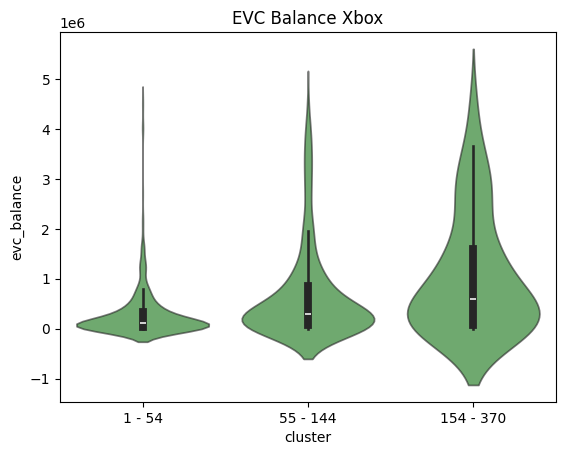

In [75]:
x10th = recentXbox['evc_balance'].quantile(0.05)
x90th = recentXbox['evc_balance'].quantile(0.95)

filteredMoneyX = recentXbox[(recentXbox['evc_balance'] >= x10th) & (recentXbox['evc_balance'] <= x90th)]
violinXbx = sns.violinplot(data=filteredMoneyX, x='cluster', y='evc_balance', alpha=0.6, scale='width', color='green', order=uniqueXbx)
violinXbx.set_xticks(range(len(new_label_xbx)))
violinXbx.set_xticklabels(new_label_xbx)
# sns.histplot(filteredMoneyX['evc_balance'], bins=10, color='green')
plt.title('EVC Balance Xbox')


xMedLow = filteredMoneyX[(filteredMoneyX['char_rank'] >= xLowMin) & (filteredMoneyX['char_rank'] <= xLowMax)]['evc_balance'].median()
xMeanLow = filteredMoneyX[(filteredMoneyX['char_rank'] >= xLowMin) & (filteredMoneyX['char_rank'] <= xLowMax)]['evc_balance'].mean()
xMedMid = filteredMoneyX[(filteredMoneyX['char_rank'] >= xMidMin) & (filteredMoneyX['char_rank'] <= xMidMax)]['evc_balance'].median()
xMeanMid = filteredMoneyX[(filteredMoneyX['char_rank'] >= xMidMin) & (filteredMoneyX['char_rank'] <= xMidMax)]['evc_balance'].mean()
xMedHigh = filteredMoneyX[(filteredMoneyX['char_rank'] >= xHighMin) & (filteredMoneyX['char_rank'] <= xHighMax)]['evc_balance'].median()
xMeanHigh = filteredMoneyX[(filteredMoneyX['char_rank'] >= xHighMin) & (filteredMoneyX['char_rank'] <= xHighMax)]['evc_balance'].mean()

print(f"Median low: {xMedLow}")
print(f"Mean low: {xMeanLow}")
print(f"Median mid: {xMedMid}")
print(f"Mean mid: {xMeanMid}")
print(f"Median high: {xMedHigh}")
print(f"Mean high: {xMeanHigh}")

In [414]:
# sns.scatterplot(data=filteredMoneyX, x='cluster', y='evc_balance', alpha=0.6, color='green')

In [415]:
# applies cluster to pure dataset based on active players
def determine_cluster_ps(row):
    if (row['char_rank'] >= psLowMin) and (row['char_rank'] <= psLowMax):
        return uniquePs4[0]
    elif (row['char_rank'] >= psMidMin) and (row['char_rank'] <= psMidMax):
        return uniquePs4[1]
    else:
        return uniquePs4[2]

Text(0.5, 1.0, 'PlayStation Monthly (Sept 2020 - Nov 2020) Item-Type Purchase Counts (All Ranks)')

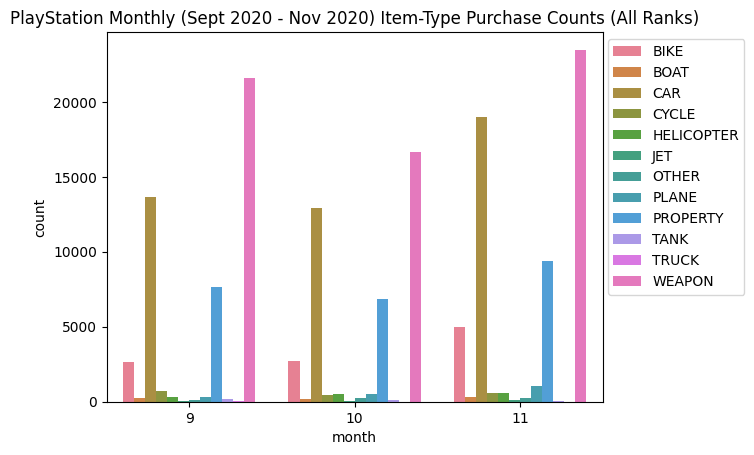

In [416]:
# next focus on what players (try to use cluster to show) buy each month (either ps4 or xbox)

# need just ps4
# cluster ps4 again into different ranks, 
# will sort by date and item type
# create histogram of item type per month

psSort = xbox.sort_values(by=['account_id', 'occur_date'], ascending=[True, False])

# checks for active players who actually play
psSort = psSort[
    (psSort['kills'] != 0) | 
    (psSort['deaths'] != 0) |
    (psSort['suicides'] != 0)
]

psSort['cluster'] = psSort.apply(determine_cluster_ps, axis=1)
psSort['month'] = psSort['occur_date'].dt.month

groupedItem = psSort.groupby(['month', 'item_type']).size().reset_index(name='count')
sns.barplot(data=groupedItem, x='month', y='count', hue='item_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title('PlayStation Monthly (Sept 2020 - Nov 2020) Item-Type Purchase Counts (All Ranks)')

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Sept 2020')

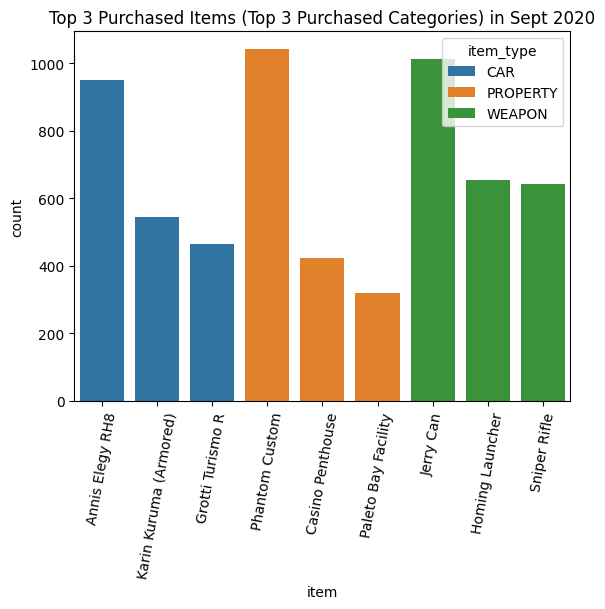

In [417]:
# THIS IS FOR HIGHEST PURCHASED ITEMS FOR ALL RANKS

psCount = psSort.groupby(['month', 'item_type'])[['item_type', 'item']].size().reset_index(name='count').sort_values(by=['month', 'count'], ascending=[True, False])
top3EachAll = psCount.groupby('month').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
blah = top3EachAll['item_type'].to_numpy()
# psSort[psSort['item_type'] == 'CAR'].groupby(['month', 'item', 'item_type']).size().reset_index(name='count').sort_values(by=['month', 'item_type', 'item', 'count'], ascending=[True, False, False, True])

arr = []
for i in range(0, len(blah), 3):
    sub_array = blah[i:i+3]
    arr.append(sub_array)
    
# ALL RANKS MOST PURCHASED ITEMS IN SEPT 2020 BASED ON MOST PURCHASED CATEGORIES

filteredSeptPs = psSort[psSort['item_type'].isin(arr[0])]
filteredSeptPs = filteredSeptPs[filteredSeptPs['month'] == 9]
filteredSeptPs = filteredSeptPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredSeptPs = filteredSeptPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredSeptPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title("Top 3 Purchased Items (Top 3 Purchased Categories) in Sept 2020")



Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Oct 2020')

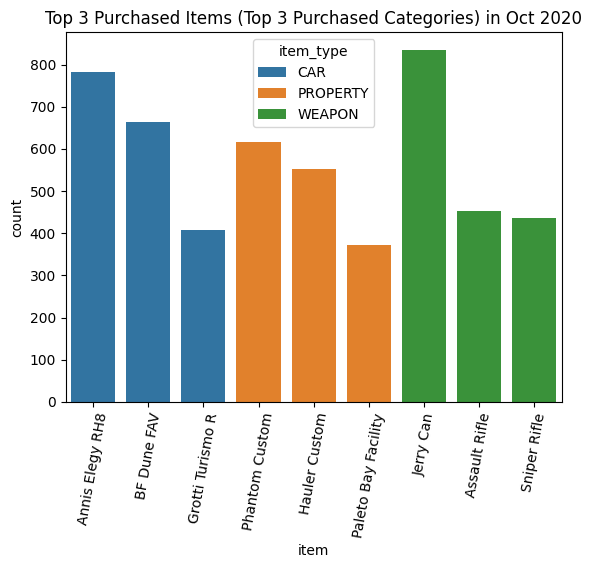

In [418]:
# ALL RANKS MOST PURCHASED ITEMS IN OCT 2020 BASED ON MOST PURCHASED CATEGORIES
filteredOctPs = psSort[psSort['item_type'].isin(arr[1])]
filteredOctPs = filteredOctPs[filteredOctPs['month'] == 10]
filteredOctPs = filteredOctPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredOctPs = filteredOctPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredOctPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title("Top 3 Purchased Items (Top 3 Purchased Categories) in Oct 2020")

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Nov 2020')

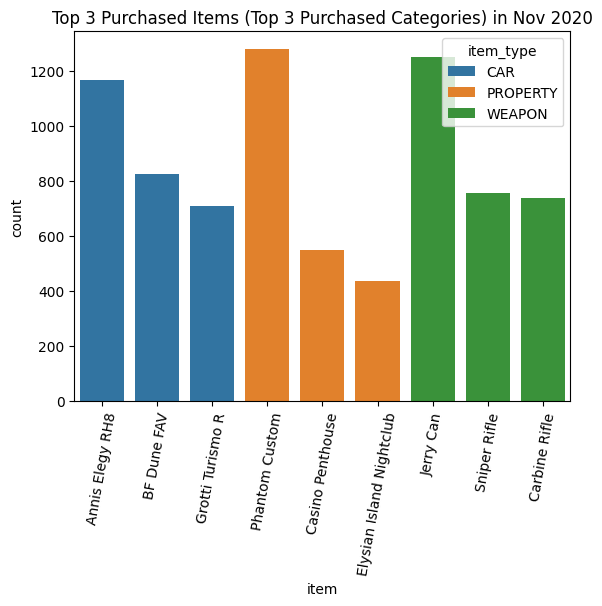

In [419]:
# ALL RANKS MOST PURCHASED ITEMS IN OCT 2020 BASED ON MOST PURCHASED CATEGORIES
filteredNovPs = psSort[psSort['item_type'].isin(arr[2])]
filteredNovPs = filteredNovPs[filteredNovPs['month'] == 11]
filteredNovPs = filteredNovPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredNovPs = filteredNovPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredNovPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title("Top 3 Purchased Items (Top 3 Purchased Categories) in Nov 2020")

Text(0.5, 1.0, 'PlayStation Monthly (Sept 2020 - Nov 2020) Item-Type Purchase Counts (Rank 1 - 54)')

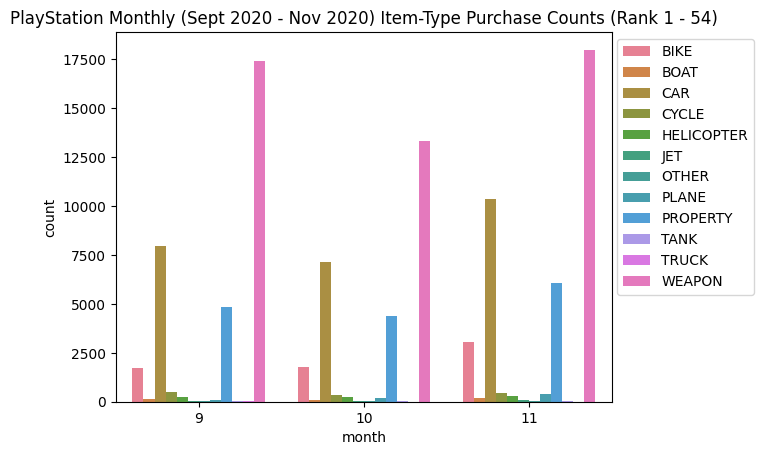

In [440]:
# first cluster, items bought
groupedItem0 = psSort[psSort['cluster'] == uniquePs4[0]].groupby(['month', 'item_type']).size().reset_index(name='count')
sns.barplot(data=groupedItem0, x='month', y='count', hue='item_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title(f'PlayStation Monthly (Sept 2020 - Nov 2020) Item-Type Purchase Counts (Rank {psLowMin} - {psLowMax})')

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Sept 2020 (Rank 1 - 54)')

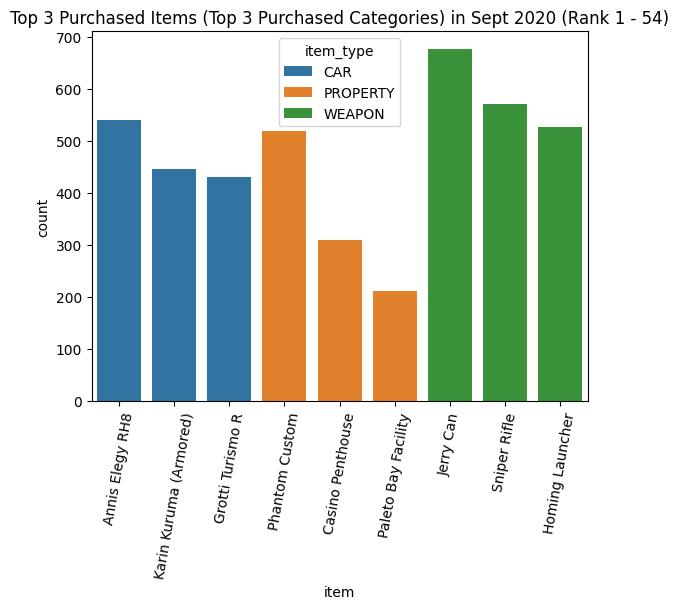

In [421]:
# For cluster 1 ranks

top3EachAll = groupedItem0.groupby('month').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
blah = top3EachAll['item_type'].to_numpy()
# psSort[psSort['item_type'] == 'CAR'].groupby(['month', 'item', 'item_type']).size().reset_index(name='count').sort_values(by=['month', 'item_type', 'item', 'count'], ascending=[True, False, False, True])

arr = []
for i in range(0, len(blah), 3):
    sub_array = blah[i:i+3]
    arr.append(sub_array)
    
filteredSeptPs = psSort[psSort['item_type'].isin(arr[0])]
filteredSeptPs = filteredSeptPs[(filteredSeptPs['month'] == 9) & (filteredSeptPs['cluster'] == uniquePs4[0])]
filteredSeptPs = filteredSeptPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredSeptPs = filteredSeptPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredSeptPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Sept 2020 (Rank {psLowMin} - {psLowMax})")

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Oct 2020 (Rank 1 - 54)')

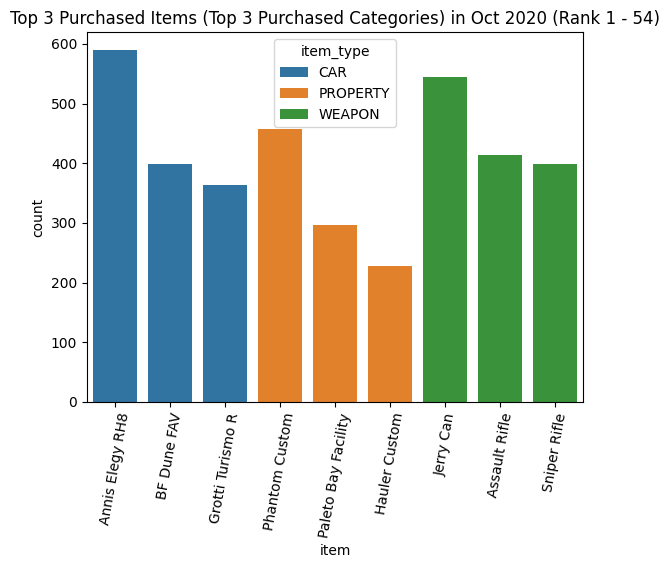

In [422]:
filteredOctPs = psSort[psSort['item_type'].isin(arr[1])]
filteredOctPs = filteredOctPs[(filteredOctPs['month'] == 10) & (filteredOctPs['cluster'] == uniquePs4[0])]
filteredOctPs = filteredOctPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredOctPs = filteredOctPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredOctPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Oct 2020 (Rank {psLowMin} - {psLowMax})")

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Nov 2020 (Rank 1 - 54)')

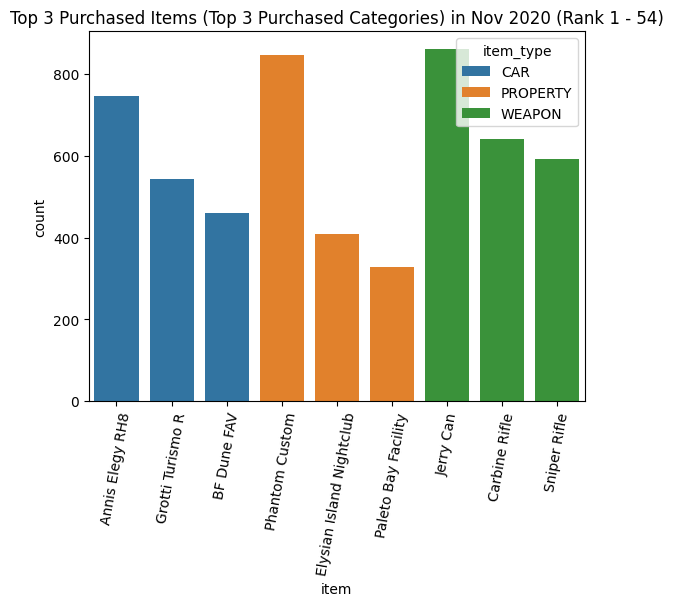

In [423]:
filteredNovPs = psSort[psSort['item_type'].isin(arr[2])]
filteredNovPs = filteredNovPs[(filteredNovPs['month'] == 11) & (filteredNovPs['cluster'] == uniquePs4[0])]
filteredNovPs = filteredNovPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredNovPs = filteredNovPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredNovPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Nov 2020 (Rank {psLowMin} - {psLowMax})")

Text(0.5, 1.0, 'PlayStation Monthly (Sept 2020 - Nov 2020) Item-Type Purchase Counts (Rank 55 - 144)')

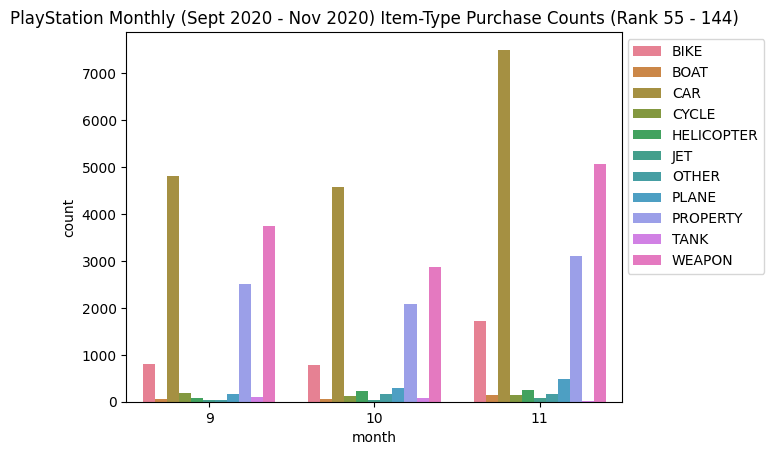

In [424]:
# second cluster, items bought
groupedItem1 = psSort[psSort['cluster'] == uniquePs4[1]].groupby(['month', 'item_type']).size().reset_index(name='count')
sns.barplot(data=groupedItem1, x='month', y='count', hue='item_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title(f'PlayStation Monthly (Sept 2020 - Nov 2020) Item-Type Purchase Counts (Rank {psMidMin} - {psMidMax})')

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Sept 2020 (Rank 55 - 144)')

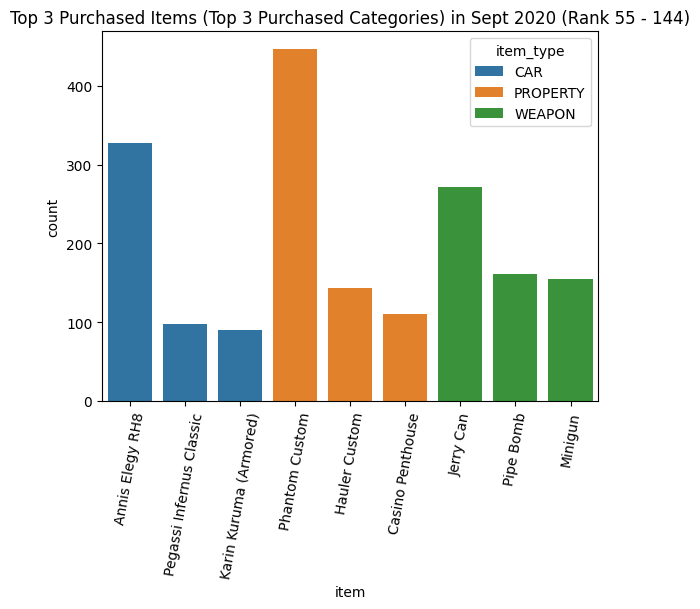

In [425]:
# For cluster 1 ranks

top3EachAll = groupedItem1.groupby('month').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
blah = top3EachAll['item_type'].to_numpy()
# psSort[psSort['item_type'] == 'CAR'].groupby(['month', 'item', 'item_type']).size().reset_index(name='count').sort_values(by=['month', 'item_type', 'item', 'count'], ascending=[True, False, False, True])

arr = []
for i in range(0, len(blah), 3):
    sub_array = blah[i:i+3]
    arr.append(sub_array)
    
filteredSeptPs = psSort[psSort['item_type'].isin(arr[0])]
filteredSeptPs = filteredSeptPs[(filteredSeptPs['month'] == 9) & (filteredSeptPs['cluster'] == uniquePs4[1])]
filteredSeptPs = filteredSeptPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredSeptPs = filteredSeptPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredSeptPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Sept 2020 (Rank {psMidMin} - {psMidMax})")

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Oct 2020 (Rank 55 - 144)')

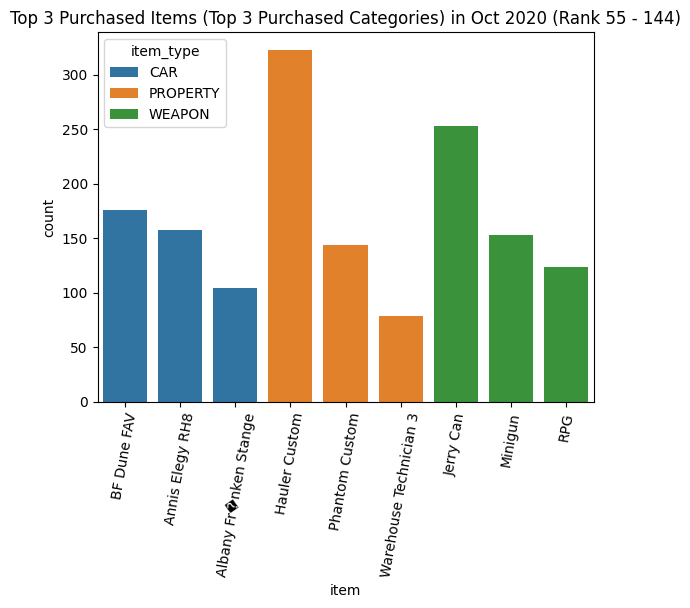

In [426]:
filteredOctPs = psSort[psSort['item_type'].isin(arr[1])]
filteredOctPs = filteredOctPs[(filteredOctPs['month'] == 10) & (filteredOctPs['cluster'] == uniquePs4[1])]
filteredOctPs = filteredOctPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredOctPs = filteredOctPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredOctPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Oct 2020 (Rank {psMidMin} - {psMidMax})")

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Nov 2020 (Rank 55 - 144)')

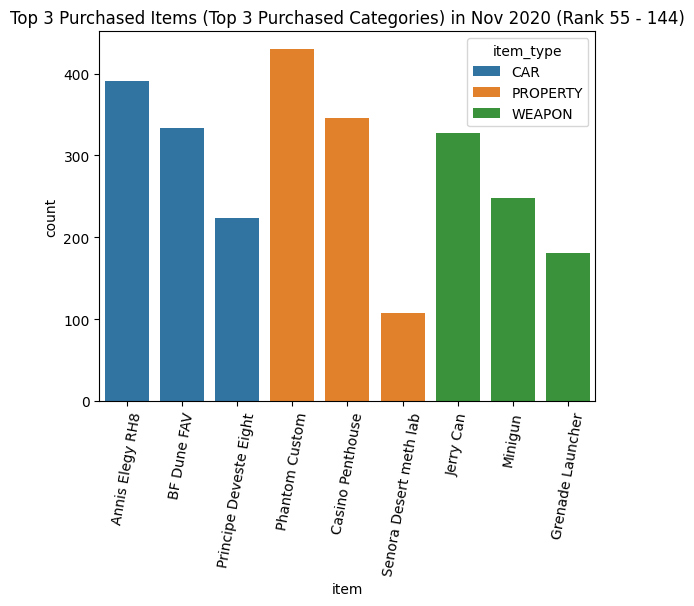

In [427]:
filteredNovPs = psSort[psSort['item_type'].isin(arr[2])]
filteredNovPs = filteredNovPs[(filteredNovPs['month'] == 11) & (filteredNovPs['cluster'] == uniquePs4[1])]
filteredNovPs = filteredNovPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredNovPs = filteredNovPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredNovPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Nov 2020 (Rank {psMidMin} - {psMidMax})")

Text(0.5, 1.0, 'PlayStation Monthly (Sept 2020 - Nov 2020) Item-Type Purchase Counts (Rank 154 - 370)')

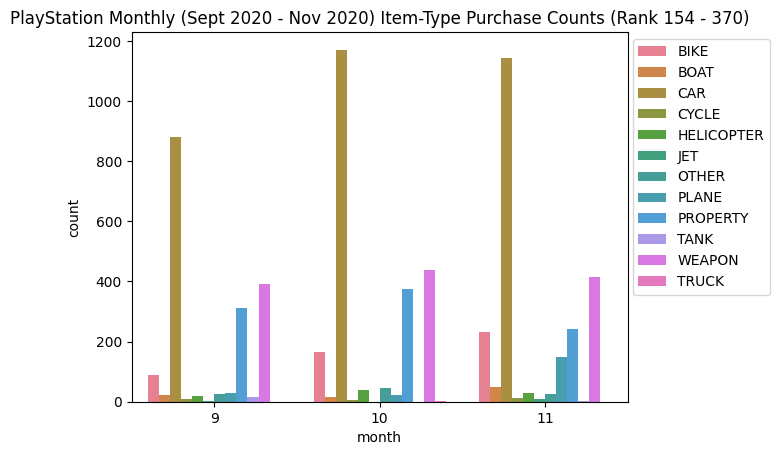

In [428]:
# third cluster, items bought
groupedItem2 = psSort[psSort['cluster'] == uniquePs4[2]].groupby(['month', 'item_type']).size().reset_index(name='count')
sns.barplot(data=groupedItem2, x='month', y='count', hue='item_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title(f'PlayStation Monthly (Sept 2020 - Nov 2020) Item-Type Purchase Counts (Rank {psHighMin} - {psHighMax})')

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Sept 2020 (Rank 154 - 370)')

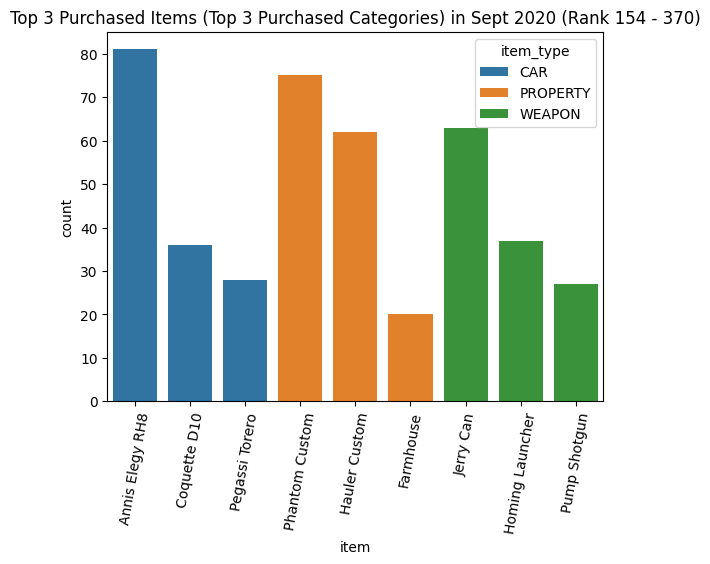

In [429]:
top3EachAll = groupedItem1.groupby('month').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
blah = top3EachAll['item_type'].to_numpy()
# psSort[psSort['item_type'] == 'CAR'].groupby(['month', 'item', 'item_type']).size().reset_index(name='count').sort_values(by=['month', 'item_type', 'item', 'count'], ascending=[True, False, False, True])

arr = []
for i in range(0, len(blah), 3):
    sub_array = blah[i:i+3]
    arr.append(sub_array)
    
filteredSeptPs = psSort[psSort['item_type'].isin(arr[0])]
filteredSeptPs = filteredSeptPs[(filteredSeptPs['month'] == 9) & (filteredSeptPs['cluster'] == uniquePs4[2])]
filteredSeptPs = filteredSeptPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredSeptPs = filteredSeptPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredSeptPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Sept 2020 (Rank {psHighMin} - {psHighMax})")

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Oct 2020 (Rank 154 - 370)')

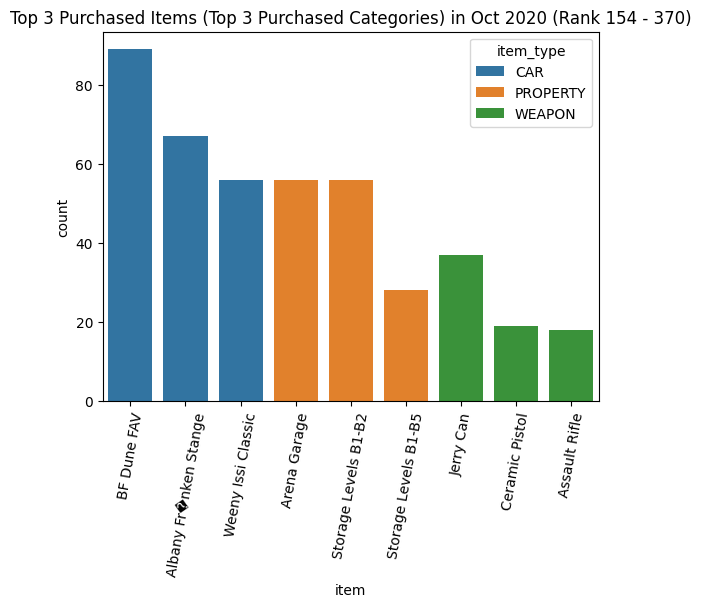

In [430]:
filteredOctPs = psSort[psSort['item_type'].isin(arr[1])]
filteredOctPs = filteredOctPs[(filteredOctPs['month'] == 10) & (filteredOctPs['cluster'] == uniquePs4[2])]
filteredOctPs = filteredOctPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredOctPs = filteredOctPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredOctPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Oct 2020 (Rank {psHighMin} - {psHighMax})")

Text(0.5, 1.0, 'Top 3 Purchased Items (Top 3 Purchased Categories) in Nov 2020 (Rank 154 - 370)')

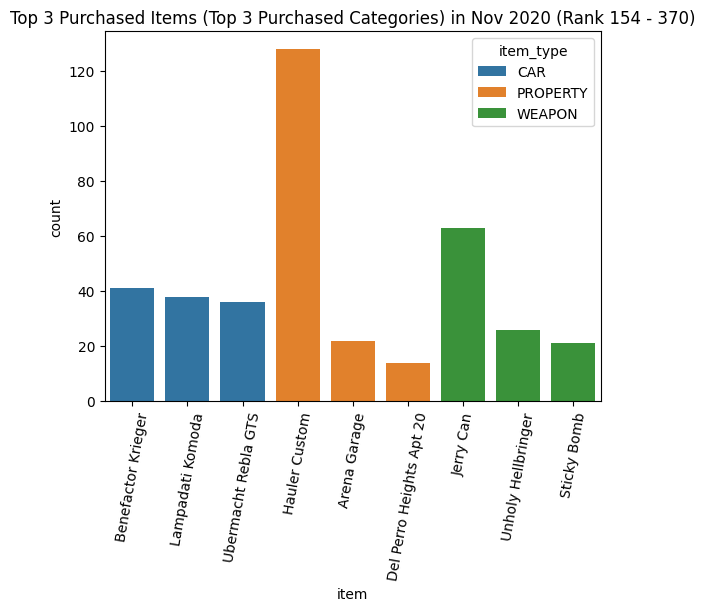

In [431]:
filteredNovPs = psSort[psSort['item_type'].isin(arr[2])]
filteredNovPs = filteredNovPs[(filteredNovPs['month'] == 11) & (filteredNovPs['cluster'] == uniquePs4[2])]
filteredNovPs = filteredNovPs.groupby(['month', 'item_type', 'item_sub_type', 'item'])['item'].size().reset_index(name='count').sort_values(by=['item_type', 'count'], ascending=[True, False])
filteredNovPs = filteredNovPs.groupby('item_type').apply(lambda x: x.nlargest(3, 'count'))
sns.barplot(data=filteredNovPs, x='item', y='count', hue='item_type')
plt.xticks(rotation=80)
plt.title(f"Top 3 Purchased Items (Top 3 Purchased Categories) in Nov 2020 (Rank {psHighMin} - {psHighMax})")

Text(0.5, 1.0, 'PlayStation Monthly (Sept 2020 - Nov 2020) Job-Type Count (All Rank)')

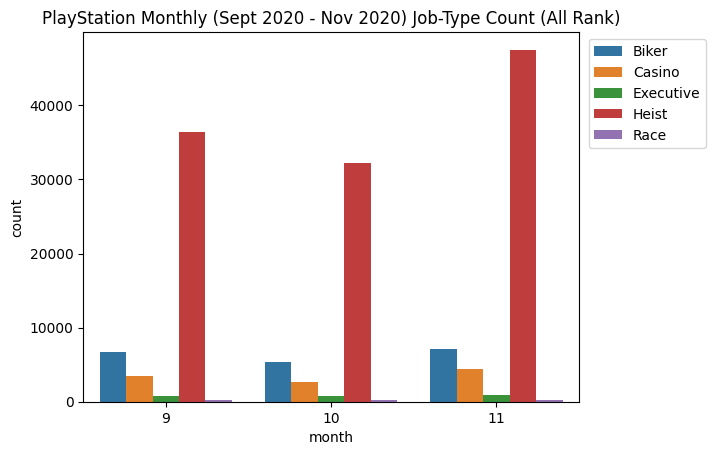

In [452]:
groupedMoney = psSort.groupby(['month', 'activity_type']).size().reset_index(name='count')
sns.barplot(data=groupedMoney, x='month', y='count', hue='activity_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1.0))
plt.title('PlayStation Monthly (Sept 2020 - Nov 2020) Job-Type Count (All Rank)')

Text(0.5, 1.0, 'PlayStation Monthly Job-Type Count (Rank 1 - 54)')

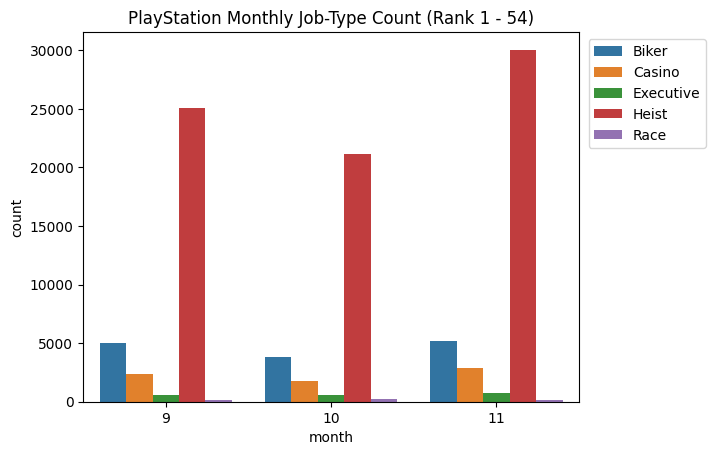

In [451]:
groupedMoney0 = psSort[psSort['cluster'] == uniquePs4[0]].groupby(['month', 'activity_type']).size().reset_index(name='count')
sns.barplot(data=groupedMoney0, x='month', y='count', hue='activity_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1.0))
plt.title(f'PlayStation Monthly Job-Type Count (Rank {psLowMin} - {psLowMax})')

Text(0.5, 1.0, 'PlayStation Monthly Job-Type Count (Rank 55 - 144)')

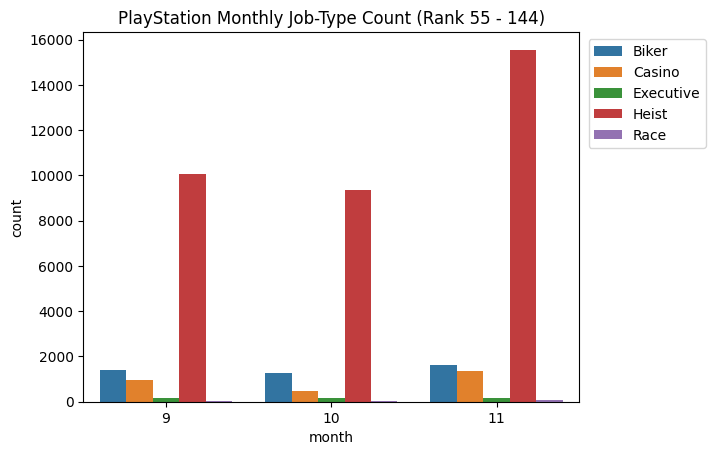

In [450]:
groupedMoney1 = psSort[psSort['cluster'] == uniquePs4[1]].groupby(['month', 'activity_type']).size().reset_index(name='count')
sns.barplot(data=groupedMoney1, x='month', y='count', hue='activity_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1.0))
plt.title(f'PlayStation Monthly Job-Type Count (Rank {psMidMin} - {psMidMax})')

Text(0.5, 1.0, 'PlayStation Monthly Job-Type Count (Rank 154 - 370)')

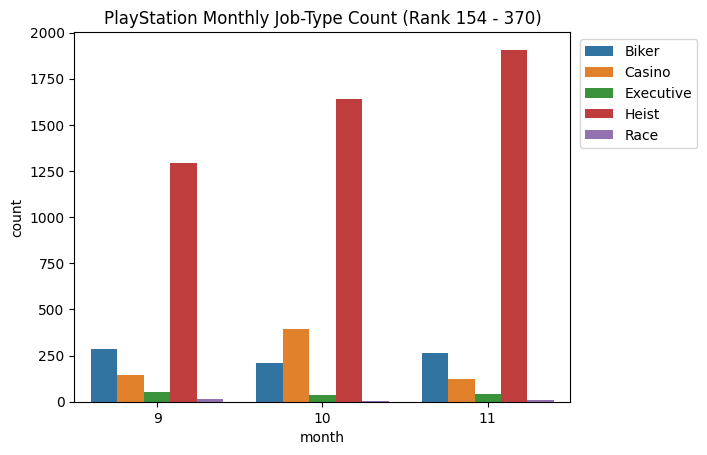

In [453]:
groupedMoney2 = psSort[psSort['cluster'] == uniquePs4[2]].groupby(['month', 'activity_type']).size().reset_index(name='count')
sns.barplot(data=groupedMoney2, x='month', y='count', hue='activity_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1.0))
plt.title(f'PlayStation Monthly Job-Type Count (Rank {psHighMin} - {psHighMax})')

Text(0.5, 1.0, 'PlayStation Average Money Vs Time Spent Per Activity (All Rank)')

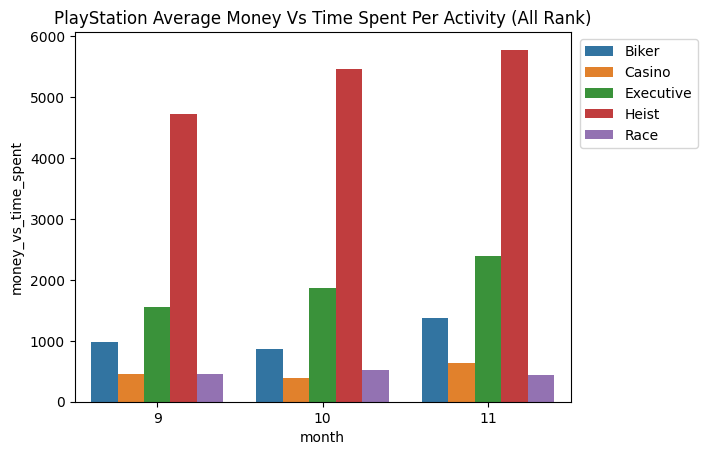

In [454]:
groupedMoney = psSort.groupby(['month', 'activity_type'])['money_vs_time_spent'].mean().reset_index()
sns.barplot(data=groupedMoney, x='month', y='money_vs_time_spent', hue='activity_type')
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1.0))
plt.title('PlayStation Average Money Vs Time Spent Per Activity (All Rank)')